**Libraries**

In [474]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [475]:
data = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



**Data Exploration**


In [476]:
summary_statistics = data.describe()
print(summary_statistics)

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9945.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156972   
std    2885.163629  32063.693350    623.245101     2.225110     0.206668   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


**Usable Functions**

In [477]:
def print_missing_values(df):
    missing_values = df.isnull().sum()
    print(missing_values)

def visualize_box_plot(data):
  numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

  # Creating box plots for each numerical column
  for column in numerical_columns:
      plt.figure(figsize=(8, 6))  # Set figure size
      sns.boxplot(x=data[column])  # Create box plot
      plt.xlabel(column)  # Set x-axis label
      plt.title(f'Box Plot of {column}')  # Set plot title
      plt.show()  # Show plot

def normalize_data(date):
  # Initialize the MinMaxScaler
  scaler = MinMaxScaler()

  # Fit and transform the 'Sales' and 'Profit' columns
  data[['Sales', 'Profit']] = scaler.fit_transform(data[['Sales', 'Profit']])

  # Display the first few rows of the DataFrame after normalization
  print(data.head())

def handle_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR


    data.loc[data[column] < lower_fence, column] = lower_fence
    data.loc[data[column] > upper_fence, column] = upper_fence

encoder = LabelEncoder()

def Feature_Encoder(data, cols):
    for c in cols:
        data[c] = encoder.fit_transform(data[c])
    return data

**Pre-Processing Steps**

In [478]:
print_missing_values(data)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64


**(1) drop unnecessary columns**

In [479]:
data.drop(data.columns[0], axis=1, inplace= True)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**(2) handle missing value [ship Date (by mode) - Discount(by mean)]**

In [480]:
mode = data['Ship Mode'].mode().iloc[0]
data['Ship Mode'].fillna(mode , inplace= True)

mean_discount = data['Discount'].mean()
data['Discount'].fillna(mean_discount, inplace=True)

In [481]:
print_missing_values(data)

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


**(3) removing duplicate rows**

In [482]:
print(data.count())

data.duplicated()
data = data.drop_duplicates()

print(data.count())

Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64
Order ID         9993
Order Date       9993
Ship Date        9993
Ship Mode        9993
Customer ID      9993
Customer Name    9993
Segment          9993
Country          9993
City             9993
State            9993
Postal Code      9993
Region           9993
Product ID       9993
Category         9993
Sub-Category     9993
Product Name     9993
Sales            9993
Quantity         9993
Discount         9993
Profit           9993
dtype: int64


**(4) outlier handling**

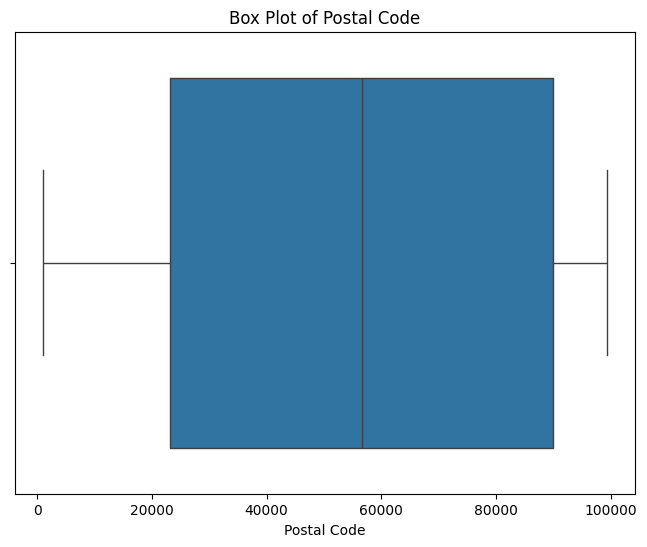

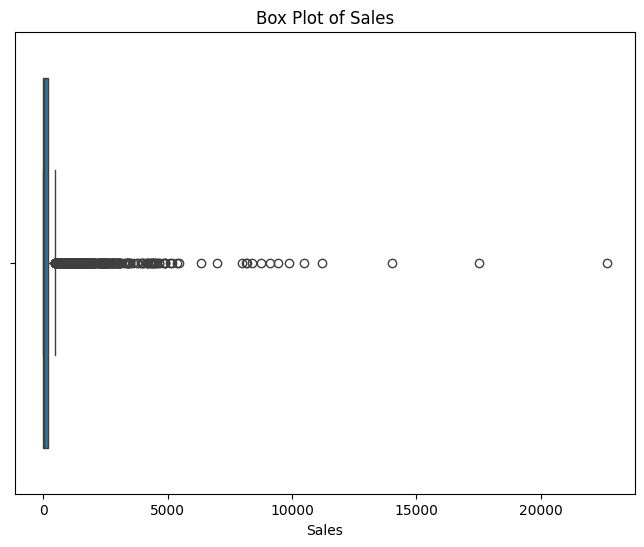

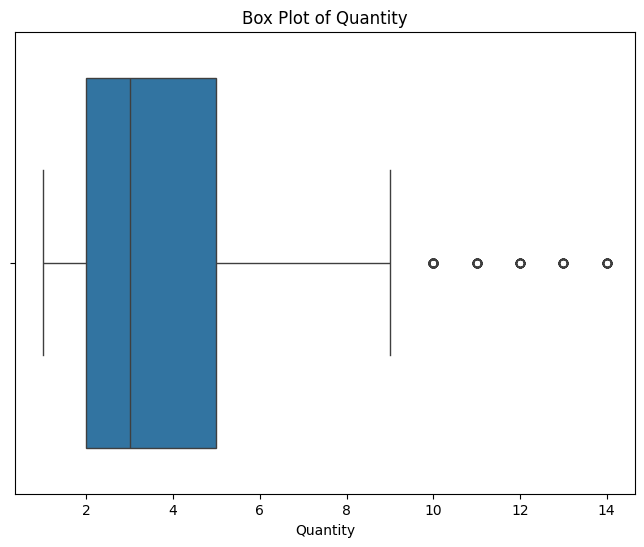

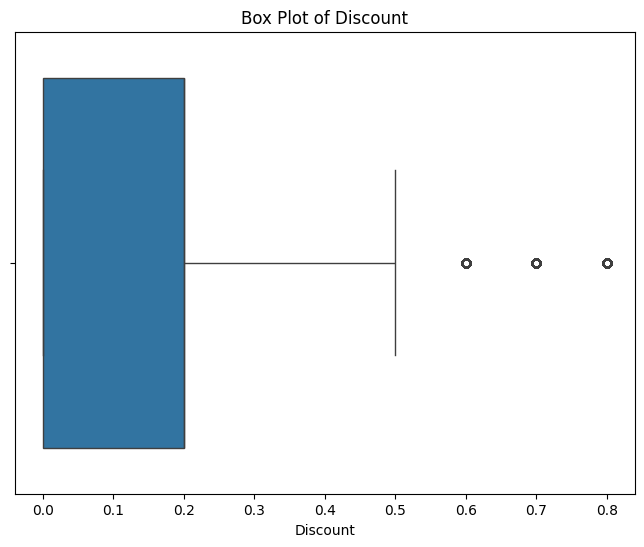

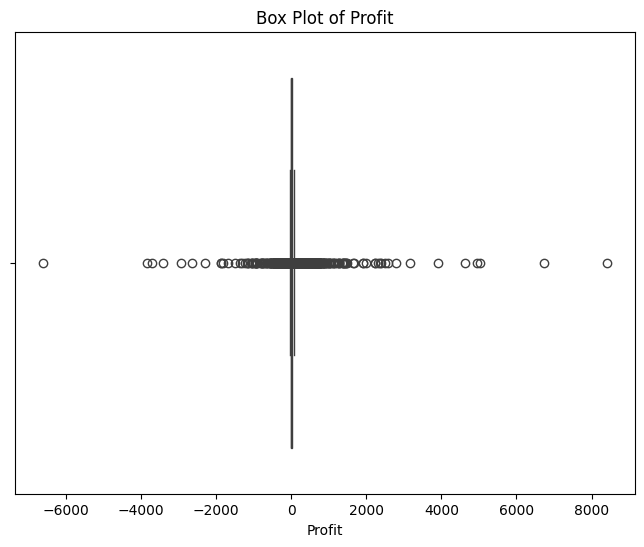

In [483]:
# Visualize before handling outliers
visualize_box_plot(data)

In [484]:
for column in data.select_dtypes(include=['number']):
    handle_outliers_iqr(data, column)

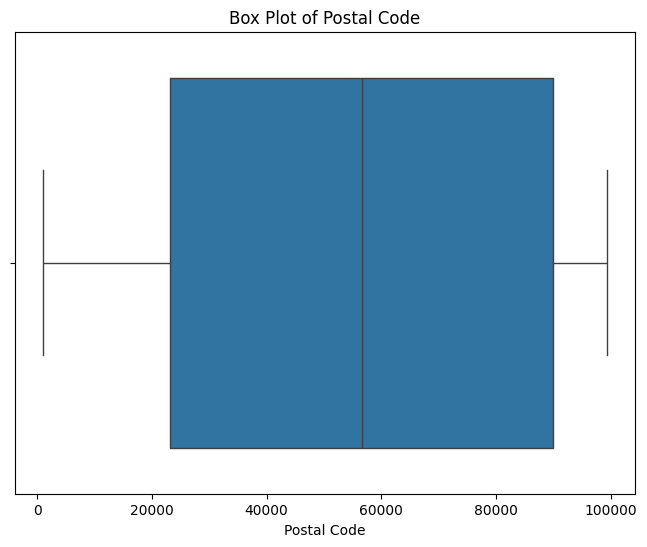

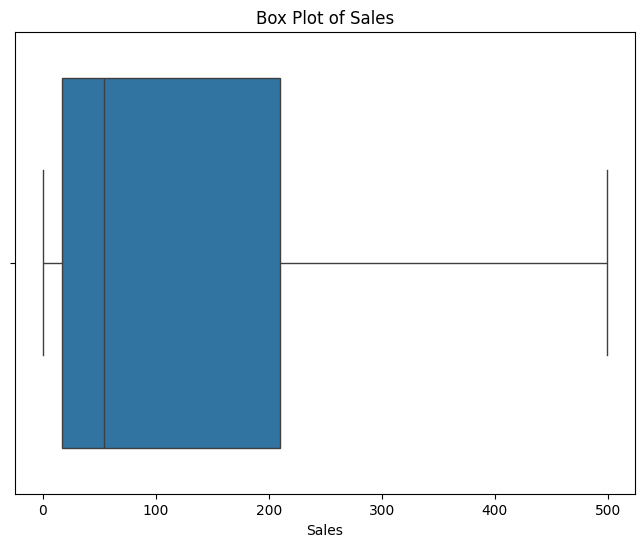

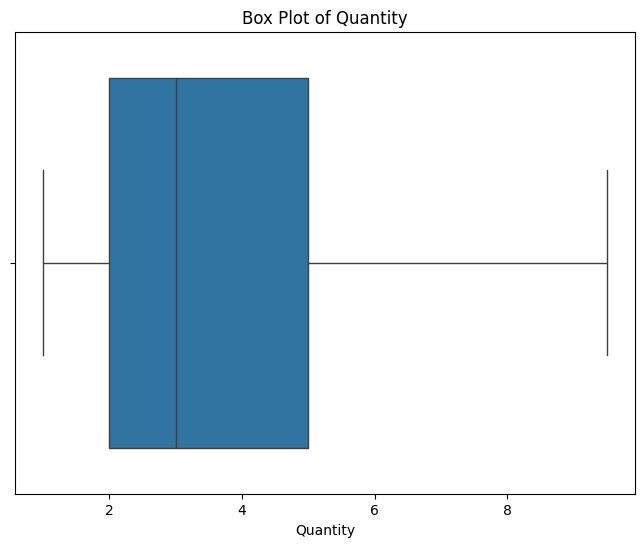

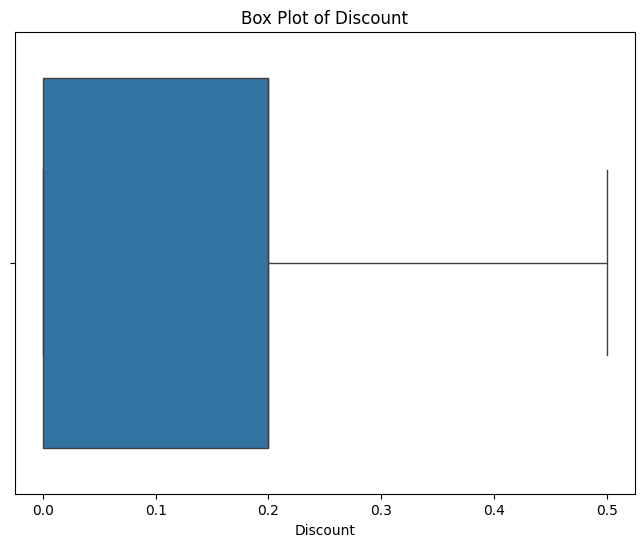

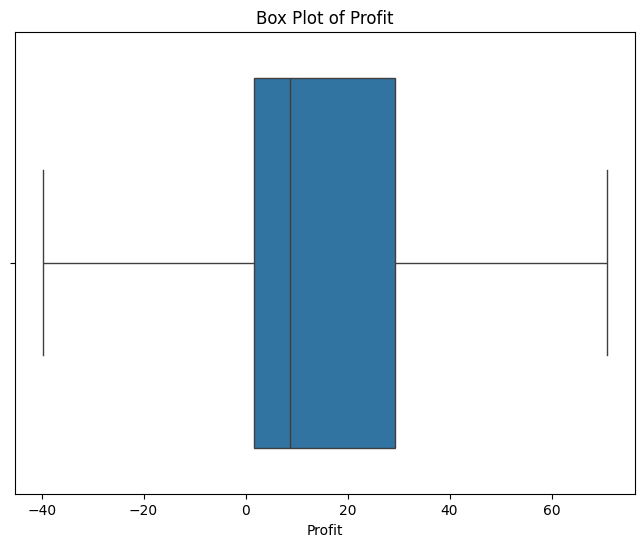

In [485]:
#Visulize after handling outliers
visualize_box_plot(data)

In [486]:
normalize_data(data)

         Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156  11/08/2016  11/11/2016    Second Class    CG-12520   
1  CA-2016-152156  11/08/2016  11/11/2016    Second Class    CG-12520   
2  CA-2016-138688  06/12/2016  06/16/2016    Second Class    DV-13045   
3  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR

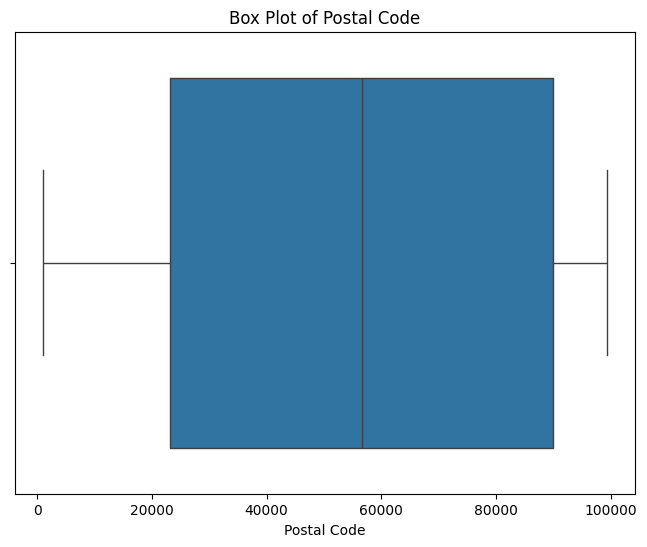

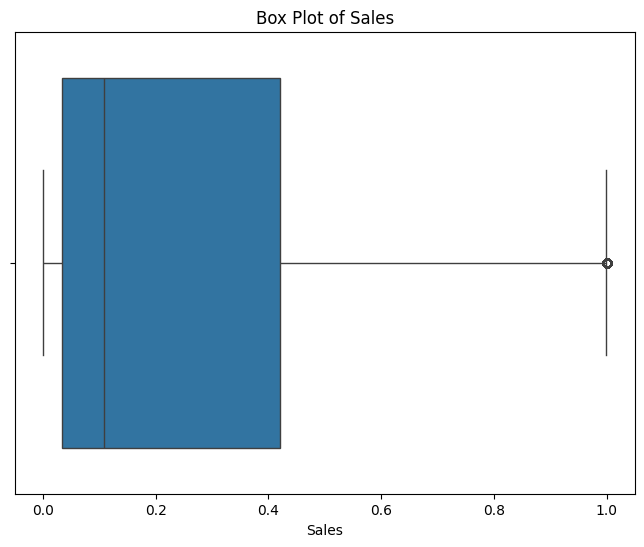

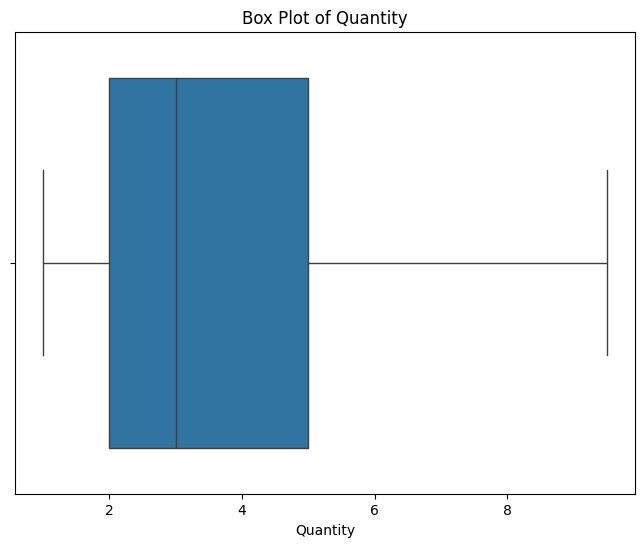

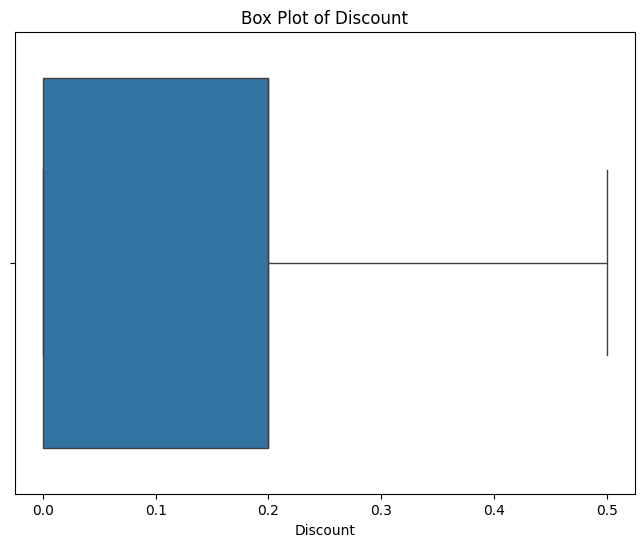

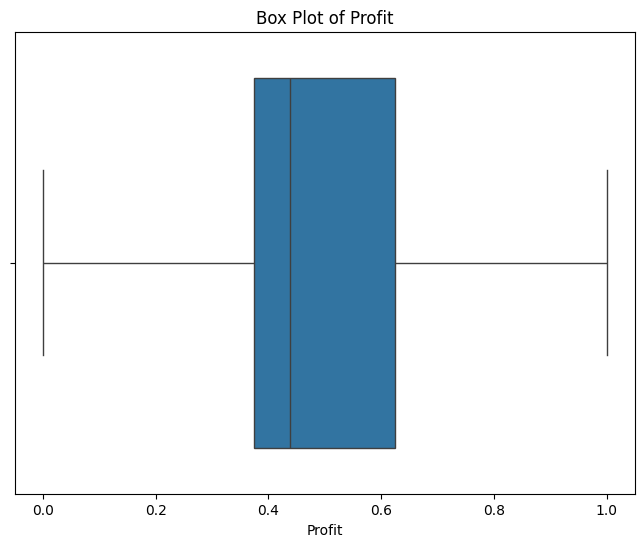

In [487]:
#Visulize after handling outliers and normalization
visualize_box_plot(data)

**(5) Handling inconsistency**

In [488]:
print(data.count())

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Filter out rows where Ship Date is smaller than Order Date
data = data[data['Ship Date'] >= data['Order Date']]

print(data.count())

Order ID         9993
Order Date       9993
Ship Date        9993
Ship Mode        9993
Customer ID      9993
Customer Name    9993
Segment          9993
Country          9993
City             9993
State            9993
Postal Code      9993
Region           9993
Product ID       9993
Category         9993
Sub-Category     9993
Product Name     9993
Sales            9993
Quantity         9993
Discount         9993
Profit           9993
dtype: int64
Order ID         9993
Order Date       9993
Ship Date        9993
Ship Mode        9993
Customer ID      9993
Customer Name    9993
Segment          9993
Country          9993
City             9993
State            9993
Postal Code      9993
Region           9993
Product ID       9993
Category         9993
Sub-Category     9993
Product Name     9993
Sales            9993
Quantity         9993
Discount         9993
Profit           9993
dtype: int64


**Exporting the dataset after cleaning**

In [490]:
# Define the file path for the CSV file
output_file_path = '/content/CleanedWalmartDataset.csv'

# Export the DataFrame to a CSV file
data.to_csv(output_file_path, index=False)